# Regresión lineal simple

In [6]:
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv("/Users/pabloarranzropero/workspace-python/curso-ml-udemy/datasets/ads/Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [23]:
model = smf.ols(formula="Sales~TV", data = data).fit()  #en formula ponemos que predecir en función a que
model.params                #Intercept = alpha; TV = beta
                            #Sales = 7.03 + 0.04*TV

Intercept    7.032594
TV           0.047537
dtype: float64

In [26]:
model.pvalues #Los p-valores son muy pequeños por lo que podemos garantizar que son significativos

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [30]:
#model.rsquared ; mejor usar el ajustado
model.rsquared_adj #Valor de R^2

0.60991482383416229

In [35]:
model.summary() #Todos los valores estadísticos que nos pueden servir
                #AIC y BIC son dos valores que cuantos mayores mejor es nuestro modelo
                #Podemos hacer variaciones y ver que modelo tiene mayor AIC y BIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           1.47e-42
Time:                        17:46:06   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
prediction = model.predict(pd.DataFrame(data["TV"]))
prediction

array([ 17.97077451,   9.14797405,   7.85022376,  14.23439457,
        15.62721814,   7.44616232,   9.76595037,  12.74649773,
         7.44140866,  16.53041431,  10.17476548,  17.23871025,
         8.16396559,  11.66741599,  16.73482186,  16.32125309,
        10.25557777,  20.40940417,  10.32212907,  14.03474068,
        17.41459582,  18.31779199,   7.6600772 ,  17.88520856,
         9.99412625,  19.52997632,  13.82557947,  18.44614092,
        18.85970969,  10.38868036,  20.95607553,  12.39948025,
        11.653155  ,  19.65832525,  11.58185004,  20.85149492,
        19.72012288,  10.58358059,   9.08142275,  17.87094757,
        16.65876324,  15.44657891,  20.98935118,  16.86792445,
         8.22576322,  15.35625929,  11.2966302 ,  18.43663359,
        17.83291826,  10.21279479,  16.53041431,  11.80527225,
        17.31952254,  15.71278409,  19.52046899,  16.48763133,
         7.37961102,  13.50708398,  17.05331735,  17.04856369,
         9.57580381,  19.45391769,  18.4081116 ,  11.91

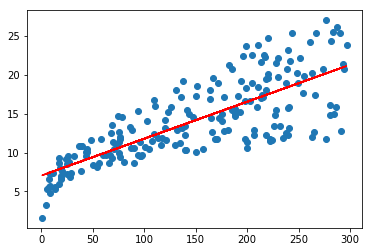

In [49]:
plt.scatter(data["TV"], data["Sales"])
plt.plot(data["TV"], prediction, color="r")

# Regresión lineal múltiple

Para saber que variables añadir podemos hacer:
* Selección hacia delante: Inicialmente vacio y añadiendo una a una las variables (Según los valores de SSR elegimos variable y vemos como va variando $R^2$...).
* Selección hacia atrás: Inicialmente todas las variables y vamos descartando las variables cuyo p-valor sea lo suficientemente grande, luego comprobamos como cambia $R^2$ al quitarla y decidimos qué hacer...

#### Selección hacia delante

Primero TV con newspaper

In [61]:
model = smf.ols(formula="Sales~TV+Newspaper", data = data).fit()
model.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [57]:
model.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [62]:
model.rsquared_adj

0.64223991508647771

Hay mejora en el valor de $R^2$ y los p-valores indican que son significativos esos atributos, de todos modos no aumenta demasiado el valor por lo que añadir Newspaper puede ser una mejora marginal.

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           3.95e-45
Time:                        21:14:45   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000         4.739     6.811
TV             0.0469      0.003     18.173      0.000         0.042     0.052
Newspaper      0.0442      0.010      4.346      0.000         0.024     0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ahora probamos con TV + Radio

In [76]:
model = smf.ols(formula="Sales~TV+Radio", data = data).fit()
model.summary()

#Esto mejora muy significativamente el estadístico F que es muy muy pequeño ahora y el R2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           4.83e-98
Time:                        21:22:21   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000         2.340     3.502
TV             0.0458      0.001     32.909      0.000         0.043     0.048
Radio          0.1880      0.008     23.382      0.000         0.172     0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
model = smf.ols(formula="Sales~TV+Radio+Newspaper", data = data).fit()
model.summary()

#El valor de F es peor y el de R2 es igual así que añadir newspaper al modelo no conviene
#Además el p-valor de newspaper es muy alto 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           1.58e-96
Time:                        21:26:50   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multicolinealidad
Si nos fijamos hay una correlación significativa entre dos variables predictoras (i.e.: Radio y Newspaper).<br>
Esto causa que el modelo tenga un peor comportamiento.<br>

In [3]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Hay que eliminar una de las dos del modelo y usamos la técnica del FIV (Factor de Inflación de la Varianza).<br>
El FIV necesita ser calculado para todas las variables y si es muy alto debemos eliminar esa variable.<br>

$$FIV = \frac{1}{1-R^2}$$

Si es 1 las variables no tienen correlación.<br>
Si esta entre 1 y 5 están correlacionadas de forma moderada con otras variables predictoras pero pueden formar parte del modelo.<br>
Si supera 5 está altamente correlacionada.

In [20]:
lm_np = smf.ols(formula="Newspaper~TV+Radio", data=data).fit()
rsqrt_np = lm_np.rsquared_adj
VIF = 1/(1 - rsqrt_np)
VIF

1.1336779578322311

In [23]:
lm_radio = smf.ols(formula="Radio~TV+Newspaper", data=data).fit()
rsqrt_radio = lm_radio.rsquared_adj
VIF = 1/(1 - rsqrt_radio)
VIF

1.1334448626622637

In [16]:
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
rsqrt_tv = lm_tv.rsquared_adj
VIF = 1/(1 - rsqrt_tv)
VIF

0.99451419413623654

Las dos variables radio y periódico tienen un VIF muy parecido así que están correlacionadas.

# Validación del modelo
Hay que comprobar si tenemos problemas de overfitting.<br>

Métodos:
* División en training y testing
* K-fold cross validation

### División del modelo en conjunto de entrenamiento y testing

In [10]:
np.random.seed(2017)

ndistr = np.random.randn(data.shape[0])
#generamos una distribución normal y nos quedamos con el 80% para train y el 20% para train
data_train = data[ndistr < 0.8]
data_test = data[~(ndistr < 0.8)]

model = smf.ols(formula="Sales~TV+Radio", data=data_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     644.4
Date:                Sat, 09 Jun 2018   Prob (F-statistic):           1.06e-76
Time:                        12:35:40   Log-Likelihood:                -314.91
No. Observations:                 161   AIC:                             635.8
Df Residuals:                     158   BIC:                             645.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.6802      0.341      7.850      0.000         2.006     3.355
TV             0.0468      0.002     29.264      0.000         0.044     0.050
Radio          0.1891      0.009     20.728      0.000         0.171     0.207
==============================================================================
Omnibus:                       50.110   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.492
Skew:                          -1.334   Prob(JB):                     3.07e-26
Kurtosis:                       6.225   Cond. No.                         419.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.6802 + 0.0468\*TV + 0.1891\*Radio

In [13]:
sales_pred = model.predict(data_test)
sales_pred

array([  8.68016215,  18.13931978,   7.97863953,  15.64465621,
        17.07429853,  18.89172303,  20.47989996,  16.37394786,
        19.96303589,  22.98385661,  11.94123457,  10.52294579,
        10.17574981,  17.3190262 ,  11.73621546,   4.26968283,
         9.56478898,  14.67716507,  11.45187822,   4.30224423,
        21.32455132,  16.29852237,  23.41591138,  20.31415486,
         3.36886884,  19.71943893,  20.95406227,  18.43981118,
        15.30162802,  14.91976892,  13.34096755,  12.12000865,
        13.92629967,  17.05094212,   8.2558956 ,  16.4186441 ,
         5.1675752 ,  12.72191858,  23.89499803])

In [18]:
SSD = sum((data_test["Sales"] - sales_pred)**2)
RSE = np.sqrt(SSD/(data_test.shape[0] - 2 - 1))
RSE

1.5639441951693873

In [21]:
error = RSE / data_test["Sales"].mean()
error

0.10490853734366377

Tenemos un error en nuestro modelo del 10.5%.<br>
Podemos concluir que el modelo no sufre un problema de overfitting ya que testeando con un conjunto de datos diferentes hay un error de tan solo el 10.5%.<br><br>
Para generar un buen "informe" de como se han comportado los distintos modelos podemos apuntar R^2 ajustado, estadístico F, p-valor, RSE, Error.<br>
Para escoger un modelo tendremos en cuenta que aumente el valor de R^2 ajustado, que disminuya el p-valor, que aumente el estadístico F y que disminuya el error.<br>
También si sospechamos que puede haber un problema de multicolinealidad (variables relacionadas entre si) deberíamos calcular el FIV.<br><br>

El valor del estadístico F decrece si añadimos una variable predictora que no pinta nada en el modelo. (Por ejemplo, al añadir Newspaper)